In [1]:
import pandas as pd
from mlxtend.preprocessing import standardize

df = pd.read_excel('scoredata.xlsx',header =None)  
print(df)


     0   1   2   3   4
0   77  82  67  67  81
1   63  78  80  70  81
2   75  73  71  66  81
3   55  72  63  70  68
4   63  63  65  70  63
..  ..  ..  ..  ..  ..
83  15  38  39  28  17
84   5  30  44  36  18
85  12  30  32  35  21
86   5  26  15  20  20
87   0  40  21   9  14

[88 rows x 5 columns]


In [2]:
df2 = standardize(df, columns = [0,1,2,3,4])
print(df2)

           0         1         2         3         4
0   2.188207  2.402770  1.552192  1.376512  2.255207
1   1.382989  2.096773  2.782758  1.579756  2.255207
2   2.073176  1.714277  1.930828  1.308765  2.255207
3   0.922864  1.637778  1.173556  1.579756  1.497510
4   1.382989  0.949285  1.362874  1.579756  1.206089
..       ...       ...       ...       ...       ...
83 -1.377760 -0.963194 -1.098259 -1.265652 -1.474991
84 -1.952916 -1.575188 -0.624964 -0.723670 -1.416707
85 -1.550307 -1.575188 -1.760872 -0.791418 -1.241854
86 -1.952916 -1.881184 -3.370074 -1.807635 -1.300138
87 -2.240494 -0.810196 -2.802120 -2.552861 -1.649844

[88 rows x 5 columns]


In [3]:
import numpy as np
import seaborn as sns
u,s,vh = np.linalg.svd(df2)
u.shape, s.shape,vh.shape
smat = np.zeros((88,5))
smat[:1,:1] = np.diag(s)[:1,:1]
x1 = np.dot(u,np.dot(smat,vh))
smat[:2,:2] = np.diag(s)[:2,:2]
x2 = np.dot(u,np.dot(smat,vh))
smat[:5,:5] = np.diag(s)[:5,:5]
x5 = np.dot(u,np.dot(smat,vh))
print(x5)

[[ 2.18820725e+00  2.40276980e+00  1.55219179e+00  1.37651235e+00
   2.25520675e+00]
 [ 1.38298881e+00  2.09677307e+00  2.78275825e+00  1.57975579e+00
   2.25520675e+00]
 [ 2.07317605e+00  1.71427715e+00  1.93082762e+00  1.30876454e+00
   2.25520675e+00]
 [ 9.22863990e-01  1.63777797e+00  1.17355595e+00  1.57975579e+00
   1.49751027e+00]
 [ 1.38298881e+00  9.49285318e-01  1.36287387e+00  1.57975579e+00
   1.20608855e+00]
 [ 8.07832784e-01  7.96286952e-01  2.02548658e+00  1.17326892e+00
   1.78893199e+00]
 [ 6.92801579e-01  1.25528205e+00  1.36287387e+00  1.24101673e+00
   1.49751027e+00]
 [ 1.15292640e+00  1.48477960e+00  1.64685074e+00  1.03777329e+00
   7.98098131e-01]
 [ 1.32547321e+00  7.19787769e-01  7.00261159e-01  1.03777329e+00
   1.61407896e+00]
 [ 1.44050442e+00  1.63777797e+00  8.89579076e-01  1.03777329e+00
   1.56970338e-01]
 [ 7.50317182e-01  1.02578450e+00  8.89579076e-01  1.10552111e+00
   6.81529442e-01]
 [ 9.22863990e-01  1.25528205e+00  7.94920117e-01  1.03777329e+00

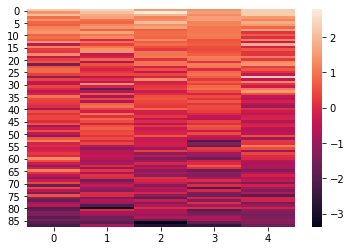

In [4]:
sns.heatmap(df2)

True

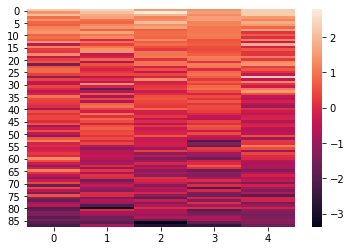

In [8]:
sns.heatmap(x5)
np.allclose(x5,df2)

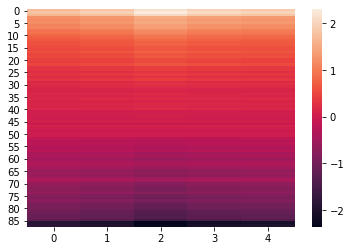

In [6]:
sns.heatmap(x1)

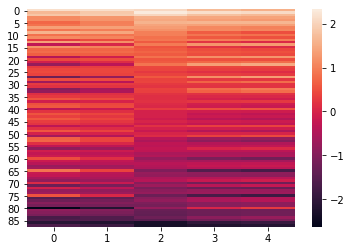

In [7]:
sns.heatmap(x2)

In [15]:
np.sum(((x1-df2)**2).sum())

94.99142481996104

In [16]:
np.sum(((x2-df2)**2).sum())

160.07374687384544

In [18]:
print(np.sum(np.power(s[1:], 2)))

160.07374687384538


In [19]:
print(np.sum(np.power(s[2:], 2)))

94.99142481996104
